# 차원 축소 

# 0. 모듈 불러오기

In [2]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd

# 행렬 연산 패키지 
import numpy as np

# matplotlib 불러오기 
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화 : 추세, 산점도 행렬
import seaborn as sns

# Scale 변환 : 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler 

# 주성분 분석 
from sklearn.decomposition import PCA

# 회귀 분석 
import statsmodels.api as sm

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 1. 데이터 불러오기

In [3]:
df_raw=pd.read_csv("/home/piai/Downloads/데이터_1/체질검사.csv", engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
# 데이터 분리 (Y,Xs) -> 설명변수를 이용한 주성분 분석
df_raw_x=df_raw.drop("FAT",axis=1)
df_raw_y=df_raw["FAT"]
df_raw_y.head()
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [6]:
# 산점도 행렬 
sns.pairplot(df_raw_x)

Error in callback <function flush_figures at 0x7f09f09df280> (for post_execute):


KeyboardInterrupt: 

In [5]:
# Pearson 상관계수 : pearson,  kendall, spearman
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [6]:
# 요약 통계량 -> scale 변환 필요 확인
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [8]:
# 변수 이름 저장
x_cols=df_raw_x.columns

# Scale 변환 : ndarray 형식
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형택 확인
print("Scaled Data: \n{}".format(nd_scaled[:5].round(3)))
print("Shape: \n{}".format(nd_scaled.shape))

Scaled Data: 
[[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape: 
(252, 13)


In [9]:
#DataFrame으로 저장
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [10]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.820,-2.060,-11.120,-2.841,-2.558,-2.152,-2.085,-2.330,-2.323,-2.366,-2.479,-3.800,-2.608
25%,-0.726,-0.679,-0.519,-0.656,-0.769,-0.742,-0.616,-0.650,-0.671,-0.652,-0.688,-0.676,-0.676
50%,-0.150,-0.083,-0.041,0.003,-0.140,-0.149,-0.085,-0.077,-0.038,-0.179,-0.074,0.018,0.075
75%,0.725,0.616,0.575,0.591,0.541,0.629,0.506,0.562,0.554,0.531,0.680,0.663,0.612
max,2.872,6.281,2.079,5.444,4.205,5.161,6.685,5.324,4.366,6.383,4.221,3.092,3.403


# 4. 주성분분석

In [11]:
# 주성분분석 : 주성분(Prin1)~주성분(Prin6) 생성 및 저장
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA Data :\n{}".format(nd_pca[:5]))
print("")

# 생성된 주성분 점수, Row, Column 개수 확인
print("Shape: \n{}".format(nd_pca.shape))

PCA Data :
[[15.14078652  0.74918006  1.73038829  2.97562799 -1.20140416  1.91649244]
 [-1.25745311 -1.79805793 -0.60359147 -0.4059414   1.33324667  0.82223682]
 [-0.72744205  2.31886158 -0.89209681  0.68258035 -0.50328047  0.60020938]
 [-3.21015592  1.46511228  0.45790754 -0.57563715  0.01977212 -0.17880332]
 [ 3.24650172  2.29304235  1.82833929 -0.02336594 -0.40697879  1.14656798]]

Shape: 
(252, 6)


In [12]:
# 주성분 점수 저장 (Prin1~Prin6, DataFrame 형식) 및 확인
df_pca=pd.DataFrame(nd_pca,columns=["Prin1","Prin2","Prin3",\
                                    "Prin4","Prin5","Prin6"])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526,15.140787,0.749180,1.730388,2.975628,-1.201404,1.916492
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020,-1.257453,-1.798058,-0.603591,-0.405941,1.333247,0.822237
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020,-0.727442,2.318862,-0.892097,0.682580,-0.503280,0.600209
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195,-3.210156,1.465112,0.457908,-0.575637,0.019772,-0.178803
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712,3.246502,2.293042,1.828339,-0.023366,-0.406979,1.146568


In [13]:
# 주성분 분석 통계량 저장 : 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,7)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)


,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921


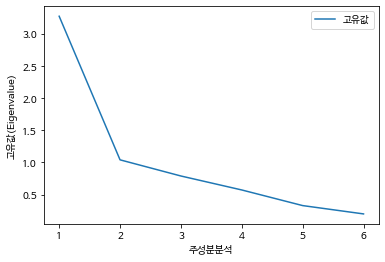

In [39]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"], label="고유값")

# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분분석")
plt.legend(loc='best')

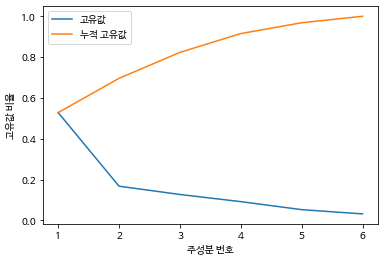

In [40]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["EigenValueRatio"], label="고유값")

# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc='best')

In [41]:
# 주성분 분석 데이터의 변수 이름
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})

# 주성분 Prin1~6까지의 고유벡터 저장
# 전치결과 pd.DataFrame(pca.components_,columns=["Prin1","Prin1","Prin1","Prin1","Prin1","Prin1"], axis=1)
# 파이썬 PCA 부석 시 SVD 연산 방식의 차이 반영 (전치, 부호 변경)
df_eigenvector=pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1,\
                        columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


# 5. 주성분 상관/회귀분석 

### 5-1 상관관계

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


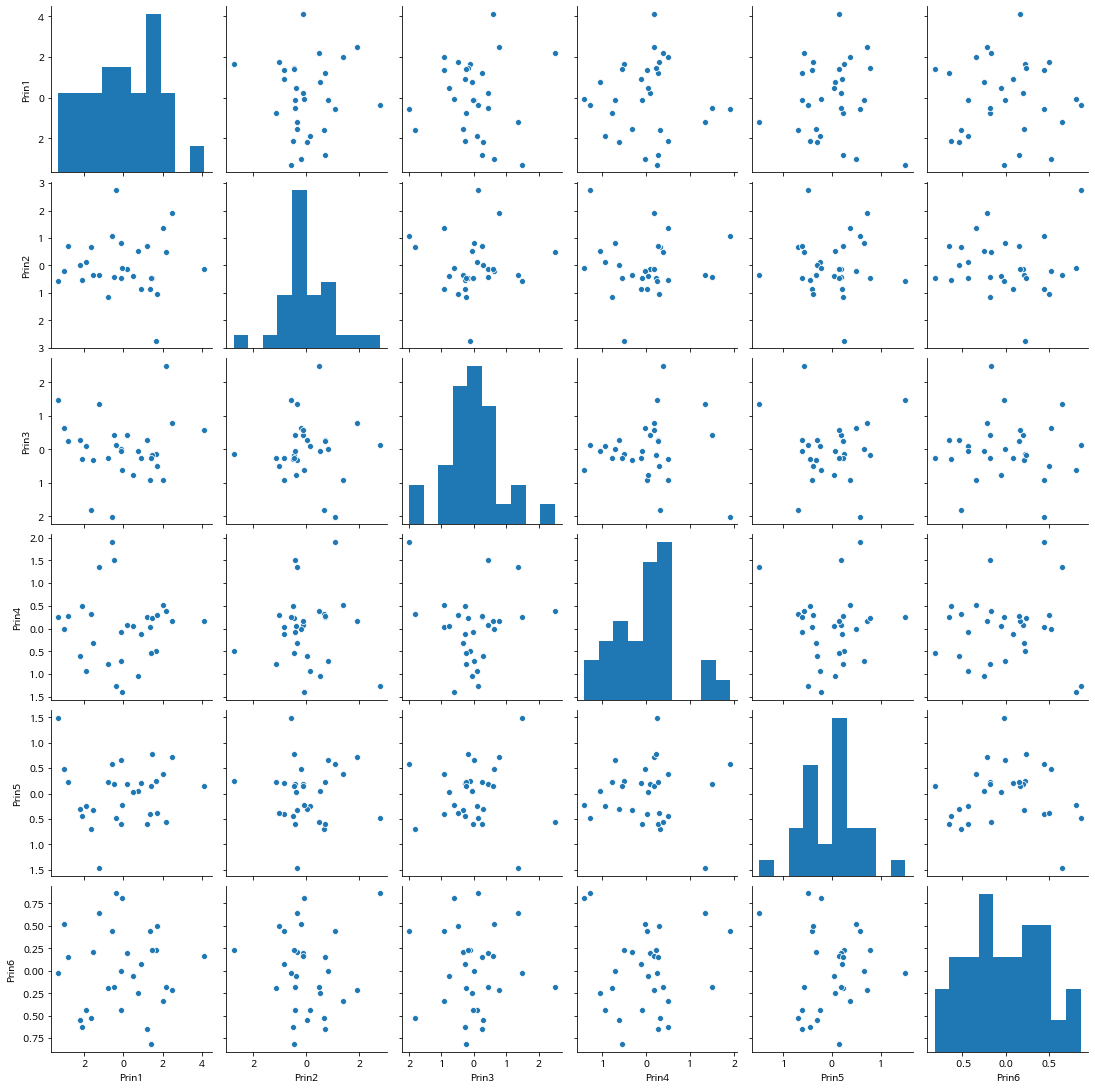

In [42]:
sns.pairplot(df_pca)

In [43]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


### 5-2 회귀분석

#### 다중선형 회귀 분석 : 원천 데이터 활용

In [48]:
# 원천 데이터에 절변 (const) 추가
df_raw_x_const=sm.add_constant(df_raw_x)

# 회귀 모델 생성
reg_model=sm.OLS(df_raw_y,df_raw_x_const)

# 회귀 모델 적합
reg_model=reg_model.fit()

# 모델 성능 확인 
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        15:49:14   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

#### 다중 선형 회귀 분석: Scale 변환 데이터 활용

In [45]:
# Scale 변환 데이터에 절변 (const) 컬럼 추가
df_scaled_const=sm.add_constant(df_scaled)
reg_model=sm.OLS(df_raw_y,df_scaled_const)
reg_model=reg_model.fit()
print(reg_model.summary())

# 단위가 다르면 분산이 달라지기 때문에 

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        15:41:25   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

#### 다중 선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용

In [47]:
# Eigenvalue, Screeplot 기준으로 적정 주성분 선택
x_var=["Prin1","Prin2","Prin3"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const=sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model=sm.OLS(df_raw_y,df_pca_const)

# 회귀모델 적합
reg_model=reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.02e-05
Time:                        15:44:19   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0